In [2]:
# Install Pandas if not already installed
#!pip install pandas
#!pip install matplotlib
#!pip install scikit-learn

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
%matplotlib inline
import warnings


In [4]:
# Define a function to read data from a CSV file
# Use Pandas to read the CSV file into a DataFrame
def read_data(path,filename):
    return pd.read_csv(path+'/'+filename)

In [5]:
# Define the path to the directory containing the 'country_wise.csv' file

path = r'C:\Users\lukas\Covid-19'
# Call the read_data function to load 'country_wise.csv' into a DataFrame
country_wise = read_data(path, 'country_wise.csv')
# Print the first few rows of the data
country_wise.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [6]:
country_wise.shape

(187, 15)

In [7]:
day_wise_worldwide = read_data(path,'day-wise-worldwide.csv')
day_wise_worldwide.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,22/01/2020,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,23/01/2020,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,24/01/2020,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,25/01/2020,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,26/01/2020,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [8]:
day_wise_worldwide.shape

(188, 12)

In [9]:
day_wise_country = read_data(path,'day-wise-country.csv')
day_wise_country.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [10]:
day_wise_country.shape

(35156, 10)

In [11]:
#Identify East African countries.
east_africa_countries = ['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia',
                         'Kenya', 'Rwanda', 'Somalia',
                         'South Sudan', 'Sudan', 'Tanzania', 'Uganda']
# Filtering data for East African countries
east_africa_data = country_wise[country_wise['Country/Region'].isin(east_africa_countries)]
east_africa_data.head(11)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
28,Burundi,378,1,301,76,17,0,22,0.26,79.63,0.33,322,56,17.39,Africa
48,Djibouti,5059,58,4977,24,9,0,11,1.15,98.38,1.17,5020,39,0.78,Eastern Mediterranean
55,Eritrea,265,0,191,74,2,0,2,0.00,72.08,0.00,251,14,5.58,Africa
58,Ethiopia,14547,228,6386,7933,579,5,170,1.57,43.90,3.57,10207,4340,42.52,Africa
90,Kenya,17975,285,7833,9857,372,5,90,1.59,43.58,3.64,13771,4204,30.53,Africa
139,Rwanda,1879,5,975,899,58,0,57,0.27,51.89,0.51,1629,250,15.35,Africa
153,Somalia,3196,93,1543,1560,18,0,22,2.91,48.28,6.03,3130,66,2.11,Eastern Mediterranean
156,South Sudan,2305,46,1175,1084,43,1,0,2.00,50.98,3.91,2211,94,4.25,Africa
159,Sudan,11424,720,5939,4765,39,3,49,6.30,51.99,12.12,10992,432,3.93,Eastern Mediterranean
166,Tanzania,509,21,183,305,0,0,0,4.13,35.95,11.48,509,0,0.00,Africa


In [12]:
# Save the filtered data to a new CSV file
east_africa_data.to_csv('east-africa-covid-data.csv', index=False)

In [13]:
kenya_county_cases = read_data(path,'kenya-county-cases-2022.csv')
kenya_county_cases.head()

,County,Cases
0,Nairobi City,"129,123"
1,Kiambu,"19,778"
2,Mombasa,"17,794"
3,Nakuru,"16,717"
4,Uasin Gishu,"10,349"


In [14]:
kenya_county_cases.shape

(11, 2)

In [15]:
#Identify East African countries and filter the DataFrame accordingly.
countries = ['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Uganda']
east_africa_daily_cases = day_wise_country[day_wise_country['Country/Region'].isin(countries)]
east_africa_daily_cases.head(30)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
28,2020-01-22,Burundi,0,0,0,0,0,0,0,Africa
48,2020-01-22,Djibouti,0,0,0,0,0,0,0,Eastern Mediterranean
55,2020-01-22,Eritrea,0,0,0,0,0,0,0,Africa
58,2020-01-22,Ethiopia,0,0,0,0,0,0,0,Africa
90,2020-01-22,Kenya,0,0,0,0,0,0,0,Africa
139,2020-01-22,Rwanda,0,0,0,0,0,0,0,Africa
153,2020-01-22,Somalia,0,0,0,0,0,0,0,Eastern Mediterranean
156,2020-01-22,South Sudan,0,0,0,0,0,0,0,Africa
159,2020-01-22,Sudan,0,0,0,0,0,0,0,Eastern Mediterranean
166,2020-01-22,Tanzania,0,0,0,0,0,0,0,Africa


In [16]:
east_africa_daily_cases.shape

(2068, 10)

In [17]:
# Convert a column to datetime type
day_wise_country['Date'] = pd.to_datetime(day_wise_country['Date'])

In [18]:
#Identify Kenya and filter the DataFrame accordingly.
country = ['Kenya']
kenya_daily_cases = day_wise_country[day_wise_country['Country/Region'].isin(country)]
kenya_daily_cases.head(30)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
90,2020-01-22,Kenya,0,0,0,0,0,0,0,Africa
277,2020-01-23,Kenya,0,0,0,0,0,0,0,Africa
464,2020-01-24,Kenya,0,0,0,0,0,0,0,Africa
651,2020-01-25,Kenya,0,0,0,0,0,0,0,Africa
838,2020-01-26,Kenya,0,0,0,0,0,0,0,Africa
1025,2020-01-27,Kenya,0,0,0,0,0,0,0,Africa
1212,2020-01-28,Kenya,0,0,0,0,0,0,0,Africa
1399,2020-01-29,Kenya,0,0,0,0,0,0,0,Africa
1586,2020-01-30,Kenya,0,0,0,0,0,0,0,Africa
1773,2020-01-31,Kenya,0,0,0,0,0,0,0,Africa


In [19]:
# Save the filtered data to a new CSV file
kenya_daily_cases.to_csv('kenya-daily-cases.csv', index=False)

In [20]:
kenya_daily_cases.shape

(188, 10)

In [21]:
# Check for missing values
missing_values = country_wise.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

# Drop rows with missing values
country_wise = country_wise.dropna()

# Alternatively, fill missing values with the mean
# df = df.fillna(df.mean())


Missing Values:
Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


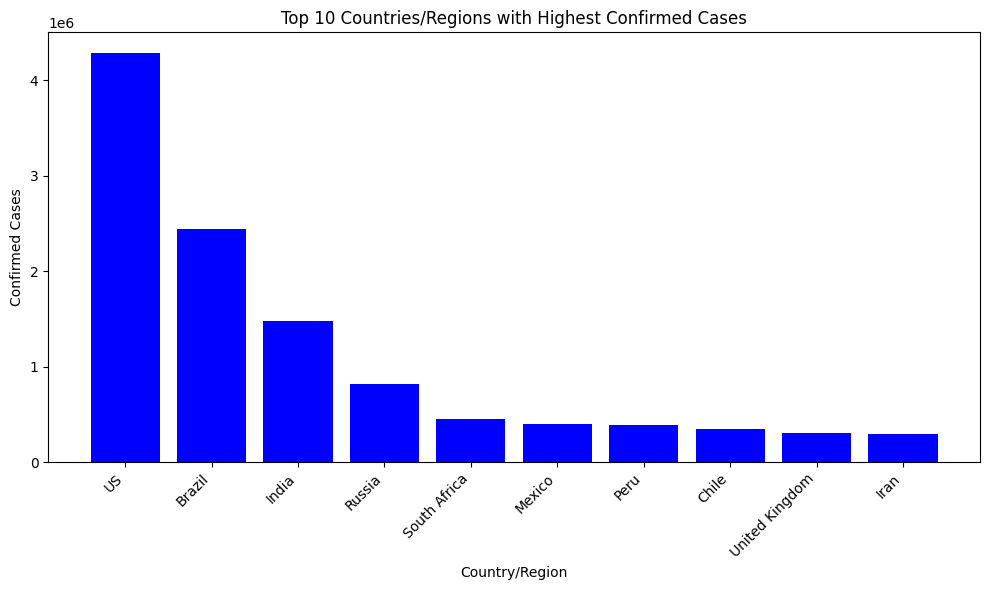

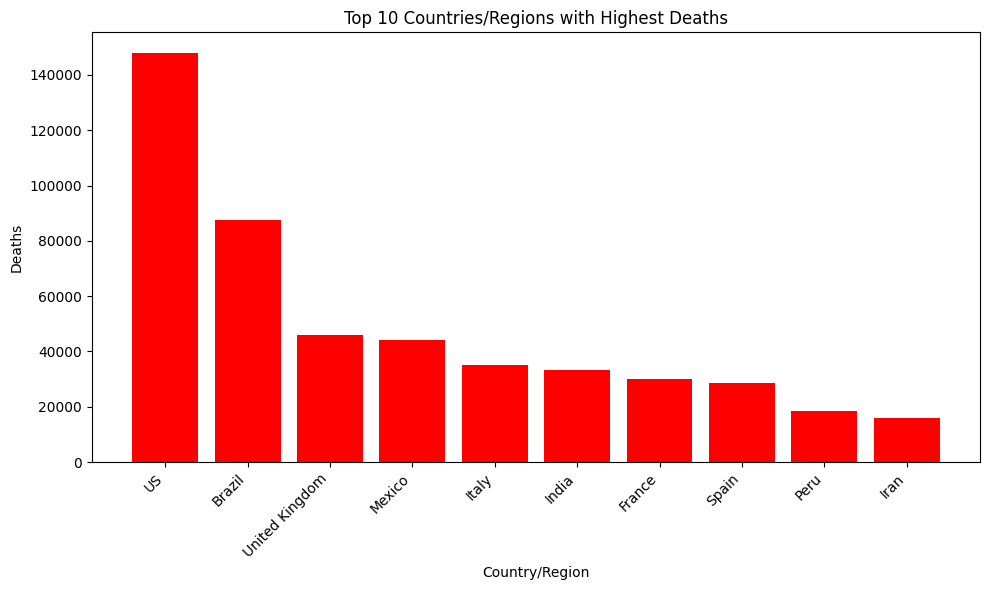

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'country_wise' is your DataFrame
# Sort the DataFrame by Confirmed cases and Deaths
df_sorted_confirmed = country_wise.sort_values(by='Confirmed', ascending=False).head(10)
df_sorted_deaths = country_wise.sort_values(by='Deaths', ascending=False).head(10)

# Plotting the bar graph for Confirmed cases
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_confirmed['Country/Region'], df_sorted_confirmed['Confirmed'], color='blue')
plt.title('Top 10 Countries/Regions with Highest Confirmed Cases')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the bar graph for Deaths
plt.figure(figsize=(10, 6))
plt.bar(df_sorted_deaths['Country/Region'], df_sorted_deaths['Deaths'], color='red')
plt.title('Top 10 Countries/Regions with Highest Deaths')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


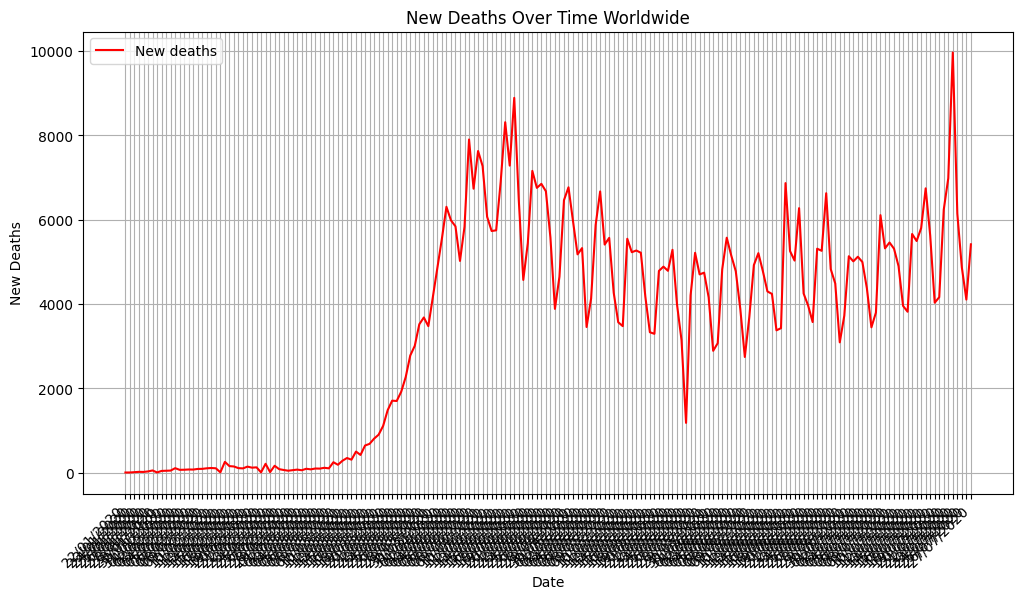

In [23]:
# Plotting the graph for New deaths over time
plt.figure(figsize=(12, 6))

# Plotting New deaths
plt.plot(day_wise_worldwide['Date'], day_wise_worldwide['New deaths'], label='New deaths', color='red')

# Set plot properties
plt.title('New Deaths Over Time Worldwide')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Show the plot
plt.show()

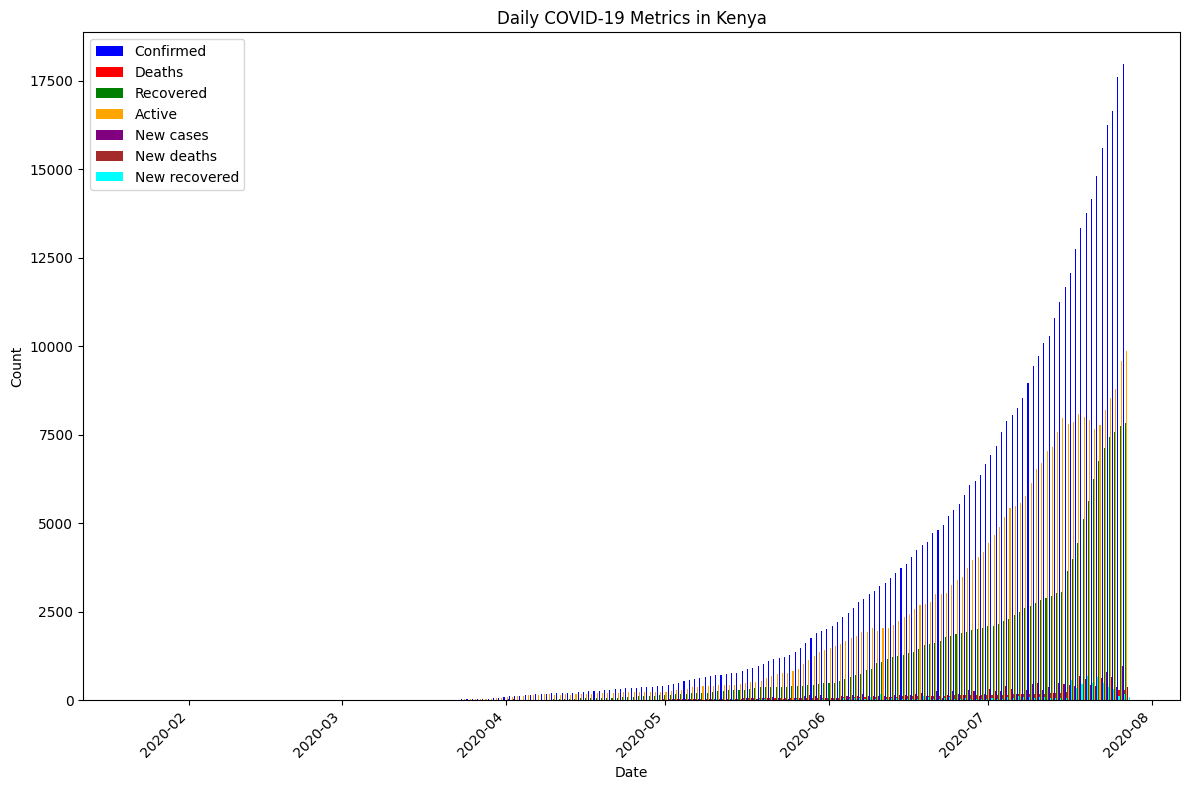

In [24]:

# Plotting the bar graph for daily COVID-19 metrics in Kenya
plt.figure(figsize=(12, 8))

# Bar width for better visibility
bar_width = 0.2
# Plotting Confirmed cases
plt.bar(kenya_daily_cases['Date'] - pd.to_timedelta(bar_width * 2, unit='d'), kenya_daily_cases['Confirmed'], width=bar_width, label='Confirmed', color='blue')
# Plotting Deaths
plt.bar(kenya_daily_cases['Date'] - pd.to_timedelta(bar_width, unit='d'), kenya_daily_cases['Deaths'], width=bar_width, label='Deaths', color='red')
# Plotting Recovered cases
plt.bar(kenya_daily_cases['Date'], kenya_daily_cases['Recovered'], width=bar_width, label='Recovered', color='green')
# Plotting Active cases
plt.bar(kenya_daily_cases['Date'] + pd.to_timedelta(bar_width, unit='d'), kenya_daily_cases['Active'], width=bar_width, label='Active', color='orange')
# Plotting New cases
plt.bar(kenya_daily_cases['Date'] + pd.to_timedelta(bar_width * 2, unit='d'), kenya_daily_cases['New cases'], width=bar_width, label='New cases', color='purple')
# Plotting New deaths
plt.bar(kenya_daily_cases['Date'] + pd.to_timedelta(bar_width * 3, unit='d'), kenya_daily_cases['New deaths'], width=bar_width, label='New deaths', color='brown')
# Plotting New recovered
plt.bar(kenya_daily_cases['Date'] + pd.to_timedelta(bar_width * 4, unit='d'), kenya_daily_cases['New recovered'], width=bar_width, label='New recovered', color='cyan')
# Set plot properties
plt.title('Daily COVID-19 Metrics in Kenya')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


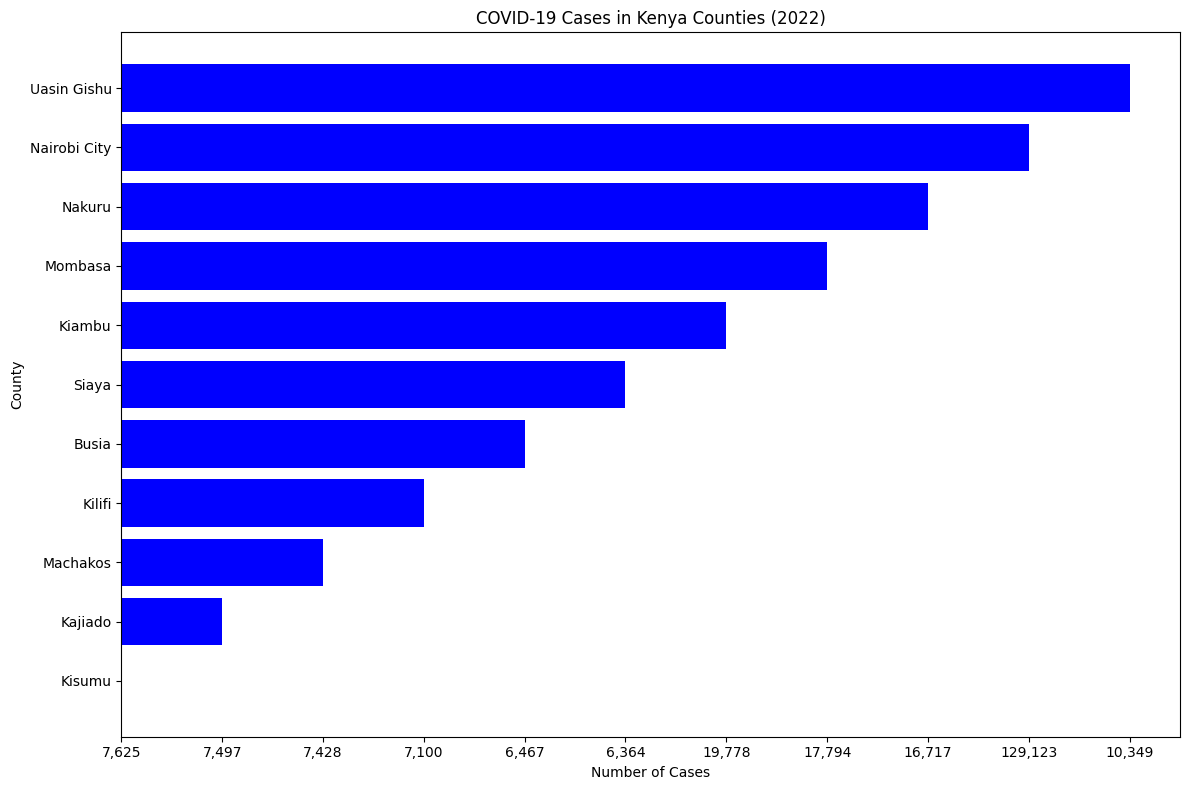

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'kenya_county_cases' is your DataFrame
# Plotting the horizontal bar graph for COVID-19 cases in Kenya counties
plt.figure(figsize=(12, 8))

# Sort the DataFrame by Cases
kenya_county_cases_sorted = kenya_county_cases.sort_values(by='Cases', ascending=False)

# Plotting the horizontal bar graph
plt.barh(kenya_county_cases_sorted['County'], kenya_county_cases_sorted['Cases'], color='blue')

# Set plot properties
plt.title('COVID-19 Cases in Kenya Counties (2022)')
plt.xlabel('Number of Cases')
plt.ylabel('County')
plt.tight_layout()

# Show the plot
plt.show()


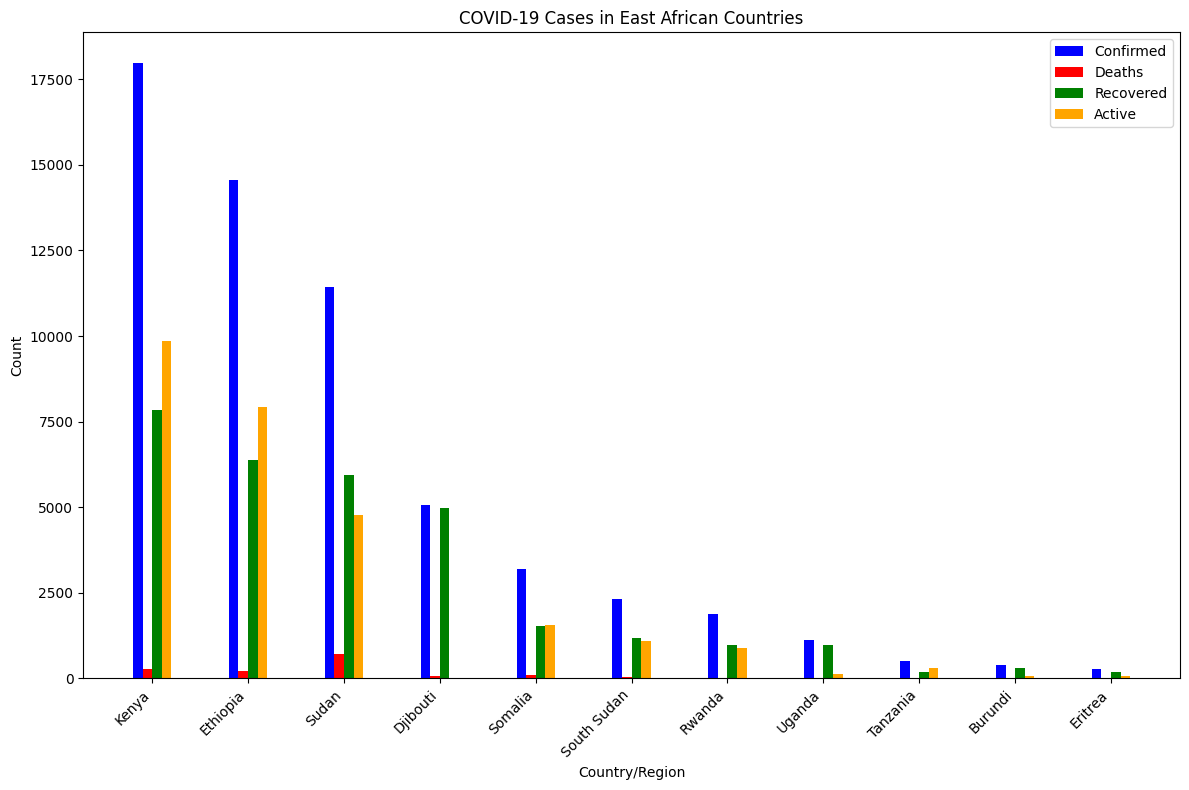

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'east_africa_data' is your DataFrame
# Sort the DataFrame by Confirmed cases
east_africa_data_sorted = east_africa_data.sort_values(by='Confirmed', ascending=False)

# Plotting the grouped bar graph
plt.figure(figsize=(12, 8))

bar_width = 0.2
bar_positions = range(1, len(east_africa_data_sorted) * 2 + 1, 2)

# Plotting Confirmed cases
plt.bar(bar_positions, east_africa_data_sorted['Confirmed'], width=bar_width, label='Confirmed', color='blue')

# Plotting Deaths
plt.bar([pos + bar_width for pos in bar_positions], east_africa_data_sorted['Deaths'], width=bar_width, label='Deaths', color='red')

# Plotting Recovered cases
plt.bar([pos + 2 * bar_width for pos in bar_positions], east_africa_data_sorted['Recovered'], width=bar_width, label='Recovered', color='green')

# Plotting Active cases
plt.bar([pos + 3 * bar_width for pos in bar_positions], east_africa_data_sorted['Active'], width=bar_width, label='Active', color='orange')

# Set plot properties
plt.title('COVID-19 Cases in East African Countries')
plt.xlabel('Country/Region')
plt.ylabel('Count')
plt.xticks([pos + 1.5 * bar_width for pos in bar_positions], east_africa_data_sorted['Country/Region'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [27]:
#Predictions for confirmed coronavirus cases worldwide
#These three models predict future covid cases on a global level. These are constructed to use the latest window of data to predict the current trend. The start date for the prediction data is 10/1/2022 to the current date.

#The prediction models include

#Support Vector Machine
#Polynomial Regression
#Bayesian Ridge Regression

C:\Users\lukas\AppData\Local\Temp\ipykernel_16344\2863032098.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kenya_daily_cases['Date'] = pd.to_datetime(kenya_daily_cases['Date'])
C:\Users\lukas\AppData\Local\Temp\ipykernel_16344\2863032098.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kenya_daily_cases['DayOfYear'] = kenya_daily_cases['Date'].dt.dayofyear


Mean Squared Error: 5658162.166098519


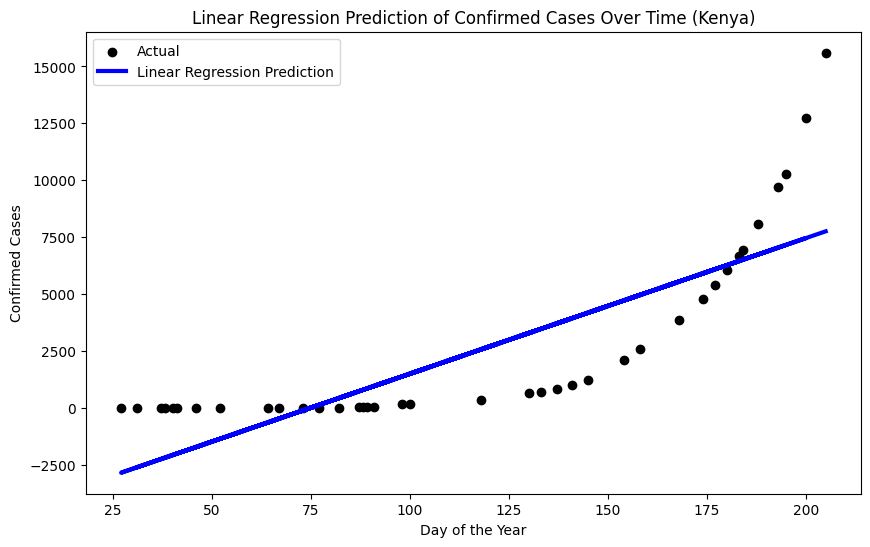

In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming kenya_daily_cases has columns: Date, Confirmed, New cases
# If not, adjust the column names accordingly

# Feature engineering: Extracting day of the year as a numerical feature
kenya_daily_cases['Date'] = pd.to_datetime(kenya_daily_cases['Date'])
kenya_daily_cases['DayOfYear'] = kenya_daily_cases['Date'].dt.dayofyear

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    kenya_daily_cases[['DayOfYear']],
    kenya_daily_cases['Confirmed'],
    test_size=0.2,
    random_state=42
)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, y_pred, color='blue', linewidth=3, label='Linear Regression Prediction')
plt.title('Linear Regression Prediction of Confirmed Cases Over Time (Kenya)')
plt.xlabel('Day of the Year')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()
